# SVHN - The Street View House Numbers (SVHN) Dataset

Dataset link: http://ufldl.stanford.edu/housenumbers/

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data preprocessing and formatting. It can be seen as similar in flavor to MNIST (e.g., the images are of small cropped digits), but incorporates an order of magnitude more labeled data (over 600,000 digit images) and comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

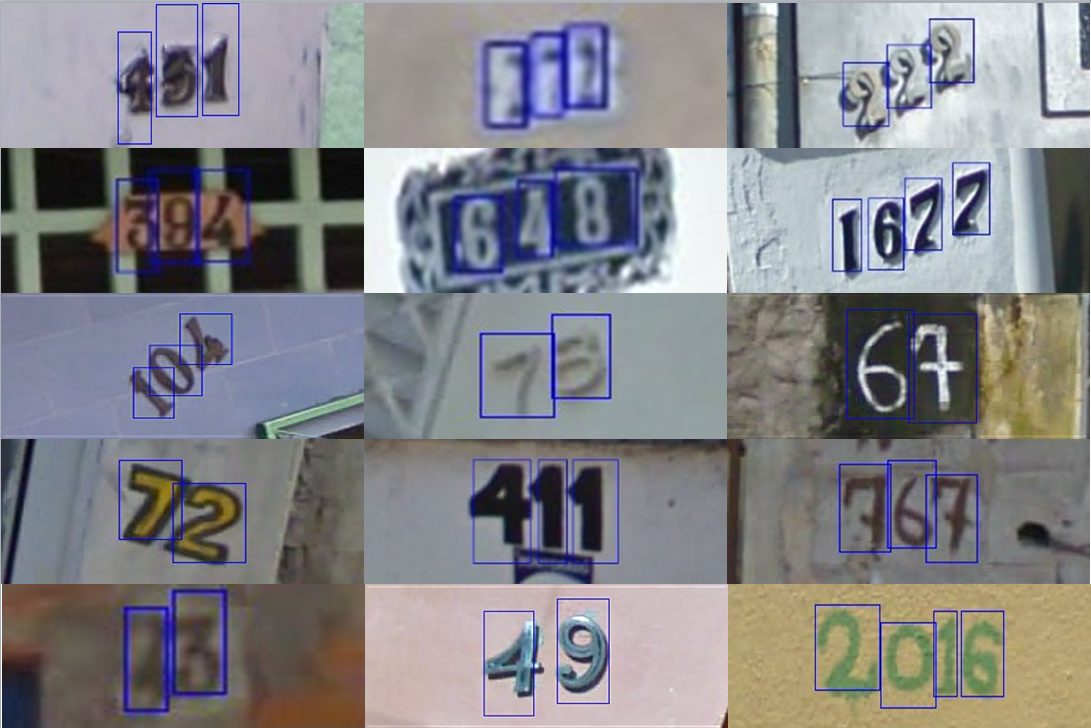

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Download and extract data

These are the original, variable-resolution, color house-number images with character level bounding boxes, as shown in the examples images above. (The blue bounding boxes here are just for illustration purposes. The bounding box information are stored in digitStruct.mat instead of drawn directly on the images in the dataset.) Each tar.gz file contains the orignal images in png format, together with a digitStruct.mat file, which can be loaded using Matlab. The digitStruct.mat file contains a struct called digitStruct with the same length as the number of original images. Each element in digitStruct has the following fields: name which is a string containing the filename of the corresponding image. bbox which is a struct array that contains the position, size and label of each digit bounding box in the image. Eg: digitStruct(300).bbox(2).height gives height of the 2nd digit bounding box in the 300th image. 

### Download file
I will download files to /fast/data/SVHN

In [2]:
# wget http://ufldl.stanford.edu/housenumbers/train.tar.gz /fast/data/SVHN
# wget http://ufldl.stanford.edu/housenumbers/test.tar.gz /fast/data/SVHN
# wget http://ufldl.stanford.edu/housenumbers/extra.tar.gz /fast/data/SVHN

### Extract file
https://www.interserver.net/tips/kb/extract-tar-gz-files-using-linux-command-line/

In [3]:
#tar xvzf /fast/data/SVHN/train.tar.gz /fast/data/SVHN
#tar xvzf /fast/data/SVHN/test.tar.gz /fast/data/SVHN
#tar xvzf /fast/data/SVHN/extra.tar.gz /fast/data/SVHN

You will have 3 ziped files: train.tar.gz, test.tar.gz, extra.tar.gz and 3 folders: train, test, extra

In [4]:
ls /fast/data/SVHN

extra/            models/          test.tar.gz      train_length.csv
extra_boxes.csv   test/            tmp/             train.tar.gz
extra.csv         test_boxes.csv   train/
extra_length.csv  test.csv         train_boxes.csv
extra.tar.gz      test_length.csv  train.csv


Many csv file are the result of preprocessing steps I will do later in this tutorial.

In [5]:
import os 
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

In [6]:
home_dir = '/fast/data/SVHN/'

## Convert .m matlab file to csv that we can easy to access in python.

In this code I will do for test data set. You can do for train and extra dataset by replacing'test' by 'train' or 'extra'

In [7]:
# we have 3 data set: train, test, and extra
dataset_name = 'test' # train, extra

In [8]:
all_files = getListOfFiles(home_dir + dataset_name)

In [9]:
all_files[0:3]

['/fast/data/SVHN/test/7471.png',
 '/fast/data/SVHN/test/5410.png',
 '/fast/data/SVHN/test/12367.png']

In [10]:
jpg_files = [file for file in all_files if file.endswith('.png')]

In [11]:
print('Number image of %s dataset: %s' % (dataset_name, len(jpg_files)))

Number image of test dataset: 13068


In [12]:
[file for file in all_files if not file.endswith('.png')]

['/fast/data/SVHN/test/digitStruct.csv',
 '/fast/data/SVHN/test/see_bboxes.m',
 '/fast/data/SVHN/test/digitStruct.mat']

In [13]:
digitStruct = '/fast/data/SVHN/%s/digitStruct.mat' % dataset_name
digitStruct

'/fast/data/SVHN/test/digitStruct.mat'

In [14]:
# import library that convert .m matlab file to csv
import sys
sys.path.append('./Py-Gsvhn-DigitStruct-Reader')

In [15]:
ls ./Py-Gsvhn-DigitStruct-Reader

digitStructMatToCsv.py*  digitStruct.py*  __pycache__/  README.md


In [16]:
from digitStructMatToCsv import convertToCsv
convertToCsv(digitStruct, digitStruct.replace('.mat', '.csv'))

Number of image files: 13068


In [17]:
!head -10 /fast/data/SVHN/{dataset_name}/digitStruct.csv

FileName,DigitLabel,Left,Top,Width,Height
1.png,5,43,7,19,30
2.png,2,99,5,14,23
2.png,1,114,8,8,23
2.png,10,121,6,12,23
3.png,6,61,6,11,16
4.png,1,32,6,14,17
5.png,9,97,28,19,28
6.png,1,40,11,7,23
7.png,1,44,7,9,21


In [18]:
# Plot some images from dataset

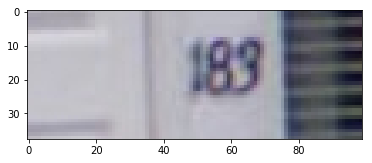

In [19]:
from fastai.plots import *

img = plt.imread('/fast/data/SVHN/%s/7.png' % dataset_name)
plt.imshow(img);

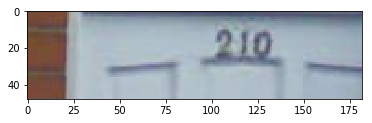

In [20]:
img = plt.imread('/fast/data/SVHN/%s/2.png' % dataset_name)
plt.imshow(img);

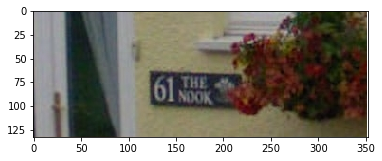

In [21]:
img = plt.imread('/fast/data/SVHN/%s/100.png' % dataset_name)
plt.imshow(img);

## Test csv result file

In [22]:
import pandas as pd

In [23]:
dataset_name = 'test'

In [24]:
df = pd.read_csv('/fast/data/SVHN/%s/digitStruct.csv' % dataset_name)

In [25]:
df[0:5]

,FileName,DigitLabel,Left,Top,Width,Height
0,1.png,5,43,7,19,30
1,2.png,2,99,5,14,23
2,2.png,1,114,8,8,23
3,2.png,10,121,6,12,23
4,3.png,6,61,6,11,16


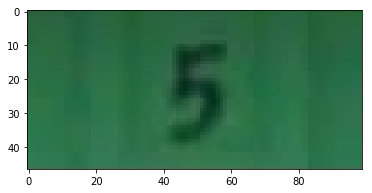

In [26]:
# This csv file show number and box in images. 
# For example we have number 5 in image 1.png. number 210 for image 2.png. They lable '0' number by label '10'.
# Let take a look
img = plt.imread('/fast/data/SVHN/%s/1.png' % dataset_name)
plt.imshow(img);

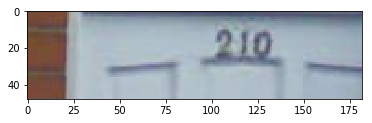

In [27]:
img = plt.imread('/fast/data/SVHN/%s/2.png' % dataset_name)
plt.imshow(img);

### Create csv file with write format that models that we will define latter can read.

1. One csv file for image and numbers.
2. One csv file for image and bounding box.
3. One csv file for image and length of number.

In [28]:
# we need to group number belong to an image together to easy to use later.
df = pd.read_csv('/fast/data/SVHN/%s/digitStruct.csv' % dataset_name)
df = df.groupby('FileName').apply(lambda x: ' '.join([str(i) for i in x.DigitLabel])).reset_index(name='tags')
df['image_name'] = df['FileName'].apply(lambda x: x.split('.')[0])
df = df[['image_name', 'tags']]
df[0:4]

,image_name,tags
0,1,5
1,10,1 6
2,100,6 1
3,1000,2 7


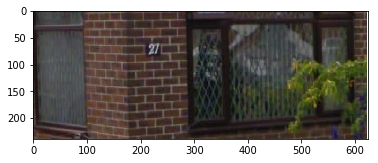

In [29]:
img = plt.imread('/fast/data/SVHN/%s/1000.png' % dataset_name)
plt.imshow(img);

In [30]:
df.to_csv('/fast/data/SVHN/%s.csv' % dataset_name, index=False)

In [31]:
!head -5 /fast/data/SVHN/{dataset_name}.csv

image_name,tags
1,5
10,1 6
100,6 1
1000,2 7


In [32]:
# Then we create csv file that contains the bounding boxes

In [33]:
df = pd.read_csv('/fast/data/SVHN/%s/digitStruct.csv' % dataset_name)
df['image_name'] = df['FileName'].apply(lambda x: x.split('.')[0])

In [34]:
df['Bottom'] = df['Top'] + df['Height'] - 1
df['Right'] = df['Left'] + df['Width'] - 1

In [35]:
df = df[['image_name', 'Top', 'Left', 'Bottom', 'Right']]

In [36]:
df['box'] = df.apply(lambda x: ' '.join([str(x[i]) for i in ['Top', 'Left', 'Bottom', 'Right']]), axis=1)

In [37]:
df = df[['image_name', 'box']]

In [38]:
df = df.groupby('image_name').apply(lambda x: ' '.join(x['box'])).reset_index(name='boxes')

In [39]:
df[0:3]

,image_name,boxes
0,1,7 43 36 61
1,10,19 16 39 22 19 26 39 37
2,100,65 124 97 142 66 138 98 151


In [40]:
df.to_csv('/fast/data/SVHN/%s_boxes.csv' % dataset_name, index=False)

In [41]:
df = pd.read_csv('/fast/data/SVHN/%s/digitStruct.csv' % dataset_name)
df['image_name'] = df['FileName'].apply(lambda x: x.split('.')[0])

In [42]:
df = df.groupby('image_name').size().reset_index(name='length')
df.to_csv('/fast/data/SVHN/%s_length.csv' % dataset_name, index=False)